Credit assignment - South German Dataset

made by Enrique Barreiro Limón

---

### **Ejercicio 1**

In [1]:
# Incluimos todas las librería que consideramos necesarias para el proyecto

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import xgboost

from pandas import read_csv
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

# Para evitar los warnings que no aportan información relevante
import warnings

In [2]:
# Verificamos las versiones de algunas de las principales librerías
mp = !python3 -V
print(mp[0])

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sklearn.__version__)
print('XGBoost', xgboost.__version__)

Python 3.9.6
Numpy 2.0.2
Pandas 2.2.2
Matplotlib 3.9.2
Seaborn 0.13.2
Scikit-Learn 1.5.2
XGBoost 2.1.4


In [3]:
# Abrimos el Archivo en un DataFrame

german_credit = pd.read_csv('SouthGermanCredit.asc', sep='\s+')
german_credit.head(3).T

,0,1,2
laufkont,1,1,2
laufzeit,18,9,12
moral,4,4,2
verw,2,0,9
hoehe,1049,2799,841
sparkont,1,1,2
beszeit,2,3,4
rate,4,2,2
famges,2,3,2
buerge,1,1,1


In [4]:
# Verificamos la dimensión del DataFrame 

print('Dimensión del DataFrame (registros, variables):', german_credit.shape)

Dimensión del DataFrame (registros, variables): (1000, 21)


In [5]:
# Diccionario de nombres de columnas en alemán traducidos al inglés
column_names = {
    "laufkont": "status_existing_account",
    "laufzeit": "duration_in_months",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "credit_amount",
    "sparkont": "savings_account",
    "beszeit": "present_employment_since",
    "rate": "installment_rate",
    "famges": "personal_status_and_sex",
    "buerge": "other_debtors",
    "wohnzeit": "present_residence_since",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "existing_credits_at_this_bank",
    "beruf": "job",
    "pers": "people_liable_for_maintenance",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"
}

# Renombramos las columnas del DataFrame utilizando el diccionario
german_credit.rename(columns=column_names, inplace=True)

# Mostramos las primeras 3 filas del DataFrame transpuestas (columnas como filas)
german_credit.head(3).T

,0,1,2
status_existing_account,1,1,2
duration_in_months,18,9,12
credit_history,4,4,2
purpose,2,0,9
credit_amount,1049,2799,841
savings_account,1,1,2
present_employment_since,2,3,4
installment_rate,4,2,2
personal_status_and_sex,2,3,2
other_debtors,1,1,1


In [6]:
# Obtenemos las estadísticas descriptivas de las variables numéricas en el DataFrame
descriptive_stats = german_credit.describe().T
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
status_existing_account,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration_in_months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
credit_amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings_account,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
present_employment_since,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_and_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


In [7]:
# Identificar las columnas categóricas de manera más precisa
categorical_columns = [col for col in german_credit.columns if german_credit[col].nunique() < 10]

# Convertir las variables categóricas a tipo `object`
german_credit[categorical_columns] = german_credit[categorical_columns].astype("object")

# Crear un DataFrame vacío para almacenar las estadísticas descriptivas de las variables categóricas
categorical_stats = pd.DataFrame(columns=['unique_values', 'top', 'freq_top'])

# Verificar si existen variables categóricas
if categorical_columns:
    # Calcular estadísticas descriptivas para cada variable categórica
    for col in categorical_columns:
        unique_values = german_credit[col].nunique()  # Número de valores únicos
        top_value = german_credit[col].mode()[0]      # Valor más frecuente (moda)
        freq_top = german_credit[col].value_counts().iloc[0]  # Frecuencia del valor más frecuente

        # Añadir los resultados al DataFrame
        categorical_stats.loc[col] = [unique_values, top_value, freq_top]

    # Mostrar el DataFrame con las estadísticas descriptivas de las variables categóricas
    print("Estadísticas descriptivas de variables categóricas:")
    
    # Si estás en Jupyter Notebook, usa display()
    from IPython.display import display
    display(categorical_stats)
    
else:
    print("No se identificaron variables categóricas.")


Estadísticas descriptivas de variables categóricas:


,unique_values,top,freq_top
status_existing_account,4,4,394
credit_history,5,2,530
savings_account,5,1,603
present_employment_since,5,3,339
installment_rate,4,4,476
personal_status_and_sex,4,3,548
other_debtors,3,1,907
present_residence_since,4,4,413
property,4,3,332
other_installment_plans,3,3,814


In [8]:
# Calculamos la cantidad de valores faltantes para cada columna usando isna()
missing_values = german_credit.isna().sum()

# Creamos un DataFrame para mostrar los resultados
missing_values_df = pd.DataFrame(missing_values, columns=['missing_count'])
missing_values_df['missing_percentage'] = (missing_values_df['missing_count'] / len(german_credit)) * 100

# Mostramos el DataFrame con el conteo y porcentaje de valores faltantes
missing_values_df

,missing_count,missing_percentage
status_existing_account,0,0.0
duration_in_months,0,0.0
credit_history,0,0.0
purpose,0,0.0
credit_amount,0,0.0
savings_account,0,0.0
present_employment_since,0,0.0
installment_rate,0,0.0
personal_status_and_sex,0,0.0
other_debtors,0,0.0


In [9]:
# Calculamos la asimetría y curtosis para las columnas numéricas
skewness = german_credit.skew()
kurtosis = german_credit.kurt()

# Mostramos los resultados
print("Asimetría:")
print(skewness)

Asimetría:
status_existing_account          0.006957
duration_in_months               1.094184
credit_history                  -0.011886
purpose                          1.178887
credit_amount                    1.949594
savings_account                  1.016677
present_employment_since        -0.117615
installment_rate                -0.531348
personal_status_and_sex         -0.305146
other_debtors                    3.264249
present_residence_since          -0.27257
property                         0.045673
age                              1.024712
other_installment_plans         -1.826518
housing                         -0.073832
existing_credits_at_this_bank    1.272576
job                             -0.374295
people_liable_for_maintenance   -1.909445
telephone                        0.391868
foreign_worker                  -4.913027
credit_risk                     -0.874183
dtype: object


La **asimetría** nos indica si la distribución de una variable está sesgada hacia la izquierda (valores negativos) o hacia la derecha (valores positivos). A continuación, se destacan las variables más relevantes.

**Asimetría (skewness):**

- Si la asimetría es cercana a 0, la distribución es aproximadamente simétrica.
- Valores positivos indican una asimetría a la derecha (cola más larga a la derecha).
- Valores negativos indican una asimetría a la izquierda (cola más larga a la izquierda).

**1. Variables con distribución aproximadamente simétrica (|Asimetría| < 0.5)** 

Estas variables no presentan un sesgo significativo y están cerca de la normalidad:
- status_existing_account (0.0069) → Casi perfectamente simétrica.
- credit_history (-0.0118) → Sin sesgo significativo.
- property (0.0457) → Muy cercana a la simetría.
- housing (-0.0738) → Sesgo despreciable.
- present_residence_since (-0.2725) → Ligera tendencia a la izquierda.
- personal_status_and_sex (-0.3051) → Ligeramente sesgada a la izquierda.
- job (-0.3742) → Ligeramente sesgada a la izquierda.
- installment_rate (-0.5313) → Un poco más sesgada a la izquierda, pero aún manejable.

**2. Variables con sesgo moderado (0.5 < |Asimetría| < 1.5)**

Estas variables presentan cierto grado de asimetría, lo que podría impactar en modelos estadísticos:
- savings_account (1.0167) → Sesgo a la derecha, valores extremos altos.
- age (1.0247) → Sesgo a la derecha, lo que significa que hay más valores bajos y algunos valores extremos altos.
- existing_credits_at_this_bank (1.2725) → Sesgo a la derecha, indicando que la mayoría tiene pocos créditos, pero hay algunos con valores elevados.
- duration_in_months (1.0942) → Sesgo a la derecha, indicando que la mayoría de los créditos son cortos, pero algunos son significativamente largos.
- purpose (1.1788) → Sesgo a la derecha, indicando que algunos propósitos de crédito son mucho más frecuentes que otros.

**3. Variables con sesgo alto (|Asimetría| > 1.5)**

Estas variables tienen distribuciones altamente sesgadas y pueden afectar análisis estadísticos:
- credit_amount (1.9496) → Sesgo a la derecha. Significa que la mayoría de los créditos son pequeños, pero hay algunos montos extremadamente altos.
- other_debtors (3.2642) → Sesgo a la derecha. Probablemente la mayoría de los clientes no tienen otros deudores, pero algunos pocos sí y en gran cantidad.
- existing_credits_at_this_bank (1.2725) → Sesgo a la derecha.
- people_liable_for_maintenance (-1.9094) → Sesgo a la izquierda. La mayoría de las personas tienen pocas o ninguna persona a cargo, pero hay pocos casos con valores muy bajos.
- other_installment_plans (-1.8265) → Sesgo a la izquierda.
- foreign_worker (-4.9130) → Sesgo a la izquierda extremo. Sugiere que la mayoría de las personas no son trabajadores extranjeros, pero hay algunos valores atípicos.

**Conclusión y Recomendaciones**
- **Variables con distribución simétrica:** No requieren cambios.
- **Variables con sesgo moderado:** Se recomienda una transformación logarítmica si se usarán en modelos lineales.
- **Variables con sesgo alto:** Se recomienda normalización o transformación Box-Cox para mejorar la distribución.
- **Variable objetivo (credit_risk) está sesgada:** Podría ser necesario un balanceo de clases en caso de ser un modelo supervisado.

In [10]:
print("\nCurtosis:")
print(kurtosis)


Curtosis:
status_existing_account          -1.663703
duration_in_months                0.919781
credit_history                   -0.579056
purpose                           0.554083
credit_amount                     4.292481
savings_account                  -0.680224
present_employment_since         -0.934331
installment_rate                 -1.210473
personal_status_and_sex          -0.002567
other_debtors                     9.328756
present_residence_since          -1.381449
property                         -1.238515
age                               0.620529
other_installment_plans           1.512588
housing                           0.484031
existing_credits_at_this_bank     1.604439
job                               0.501891
people_liable_for_maintenance     1.649274
telephone                        -1.850144
foreign_worker                   22.182198
credit_risk                      -1.238284
dtype: object


La **curtosis** mide la "agudeza" de la distribución de los datos. Valores cercanos a 0 indican una distribución normal. Valores positivos indican una distribución más concentrada alrededor de la media, mientras que valores negativos indican una distribución más plana.

**Curtosis:**

- Si la curtosis es cercana a 3, la distribución tiene una forma normal (mesocúrtica).
- Valores mayores a 3 indican colas más pesadas (leptocúrtica).
- Valores menores a 3 indican colas más ligeras (platicúrtica).

**1. Variables con curtosis baja (Platicúrticas, dispersión alta)**

Estas variables tienen valores de curtosis menores a 3, indicando que los datos están más dispersos y tienen menos valores extremos:
- status_existing_account (-1.6637)
- credit_history (-0.5790)
- savings_account (-0.6802)
- present_employment_since (-0.9343)
- installment_rate (-1.2104)
- personal_status_and_sex (-0.0025)
- present_residence_since (-1.3814)
- property (-1.2385)
- telephone (-1.8501)
- credit_risk (-1.2382)

**2. Variables con curtosis moderada (≈ 3 o cercana a 0)**

Estas variables tienen valores de curtosis cercanos a una distribución normal:
- duration_in_months (0.9197)
- purpose (0.5540)
- age (0.6205)
- housing (0.4840)
- job (0.5018)

**3. Variables con curtosis alta (Leptocúrticas, valores extremos frecuentes)**

Estas variables tienen curtosis mayor a 3, lo que indica una alta concentración de datos en la media y colas largas con valores extremos:
- credit_amount (4.2924) → Valores extremos en los montos de crédito.
- other_debtors (9.3287) → Algunos clientes tienen muchos otros deudores, aunque la mayoría tiene pocos.
- other_installment_plans (1.5125) → Concentración alta en algunos valores específicos.
- existing_credits_at_this_bank (1.6044) → Pocos valores extremos, pero ligeramente más centralizado.
- people_liable_for_maintenance (1.6492) → Algunos clientes tienen muchas personas a su cargo.
- foreign_worker (22.1821) → Distribución extremadamente sesgada. Hay una gran diferencia entre quienes son trabajadores extranjeros y quienes no.

**Recomendaciones**

- **Variables platicúrticas (<3, colas ligeras):** Datos dispersos, menos valores extremos. No requieren transformación inmediata, pero pueden tener problemas en modelos que asumen normalidad.
- **Variables cercanas a la normalidad (~3):** Distribución bien equilibrada. No requieren ajustes.
- **Variables leptocúrticas (>3, colas pesadas):** Muchas observaciones cercanas a la media, pero con valores extremos en los extremos. Posible solución: Transformaciones logarítmicas, normalización o winsorización de valores extremos. Es importante explorar su impacto y decidir si es necesario tratarlas antes.

## **Ejercicio 2**

In [11]:
# De la documentación de los datos SouthGermandata se sabe que la clase mayoritaria
# de los buenos clientes se etiquetó con el valor de 1 en la variable de salida
# llamada "credit_risk".
# Veamos:

print(german_credit['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64


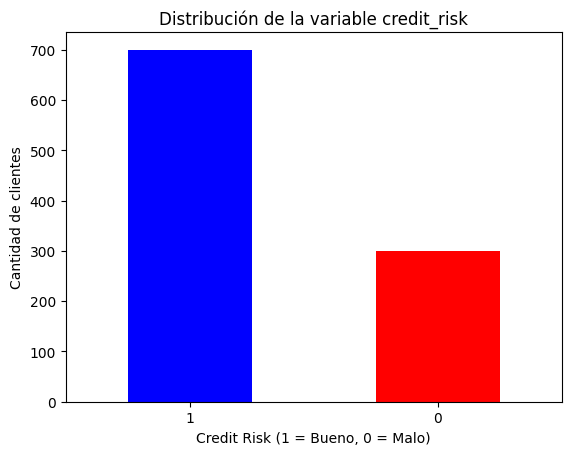

In [12]:
# Graficamos la distribución de la variable credit_risk
german_credit['credit_risk'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Credit Risk (1 = Bueno, 0 = Malo)")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de la variable credit_risk")
plt.xticks(rotation=0)  # Aseguramos que las etiquetas del eje X sean legibles
plt.show()

Esto significa que:
- (Buenos clientes): 700 casos (70%)
-  (Malos clientes): 300 casos (30%)

La clase mayoritaria son los buenos clientes (1), lo cual indica un desbalance de clases en los datos.

In [13]:
# Invertimos los valores de la variable credit_risk (0 ⇆ 1)
german_credit['credit_risk'] = german_credit['credit_risk'].apply(lambda x: 0 if x == 1 else 1)

# Verificmos la transformación mostrando el conteo de valores
print(german_credit['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


### **Ejercicio 3**

In [14]:
# Definimos las variables predictoras (X) y variable objetivo (y)
X = german_credit.drop(columns=['credit_risk'])  # Eliminar la variable objetivo
y = german_credit[['credit_risk']]  # Variable objetivo en formato DataFrame

# Realizamos la partición de los datos con el porcentaje solicitado (ejemplo: 80% entrenamiento, 20% prueba)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = (ytrain.sum()/ytrain.shape[0]).iloc[0]
print("\nPorcentaje clases Positiva: {:.2f}%, y Negativa: {:.2f}%".format(100*(1-tmp), tmp*100))

Dimensiones:
Entrenamiento: (800, 20) (800, 1)
Prueba: (200, 20) (200, 1)

Porcentaje clases Positiva: 70.00%, y Negativa: 30.00%


### **Ejercicio 3b**

Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?

Sí, tenemos un problema de datos desbalanceado, ya que la variable de salida (credit_risk) tiene una distribución desigual entre sus clases.
- El modelo tenderá a predecir la clase mayoritaria (1) con más frecuencia, ignorando la clase 0.
- Alta precisión (accuracy), pero bajo rendimiento en detección de la clase 0 (clientes de alto riesgo).
- Métricas como accuracy pueden ser engañosas: Si el modelo predice "siempre 1", tendrá 70% de precisión, pero nunca detectará clientes con riesgo (0).

Soluciones recomendadas
Para abordar este desbalance, se pueden aplicar las siguientes técnicas:
- Sobremuestreo (SMOTE) de la clase minoritaria (duplicar ejemplos de la clase 0).
- Submuestreo de la clase mayoritaria (reducir ejemplos de la clase 1).
- Uso de métricas adecuadas: F1-score, Precision-Recall y AUC-ROC, en lugar de solo accuracy.
- Ajustar pesos en modelos:Usar class_weight='balanced' en sklearn para darle más peso a la clase minoritaria.


### **Ejercicio 3c**

¿Por qué se hizo el cambio de etiquetas 0 y 1 en la variable de salida?

- Facilitar la interpretación de la clase minoritaria como el evento de interés. En problemas de clasificación, es común que la clase positiva (1) represente el evento que queremos detectar. En este caso, el evento de interés es identificar clientes de alto riesgo (antes etiquetados como 0)
- Mejor manejo de métricas y modelos de clasificación. Muchas técnicas de balanceo y optimización de modelos están diseñadas para que la clase positiva (1) sea la menos frecuente. Ejemplo: Recall, F1-score y AUC-ROC tienen más sentido cuando la clase 1 representa la categoría que queremos predecir.
- Evitar sesgos en el entrenamiento del modelo. Si la clase mayoritaria es positiva, los modelos pueden aprender a predecir siempre 1 y alcanzar alta precisión sin realmente detectar la clase minoritaria.

Esto garantiza que el modelo se enfoque en detectar clientes con alto riesgo (1), en lugar de simplemente predecir la mayoría. En conclusión, la codificación de credit_risk se modificó para que la clase positiva (1) represente a los clientes con mayor riesgo crediticio, lo que facilita el balanceo de clases, la interpretación del modelo y el cálculo de métricas. 

### **Ejercicio 4**

In [15]:
# Variables numéricas
lista_paper_num = [
    "duration_in_months",
    "credit_amount",
    "age"
]

# Variables ordinales
lista_paper_ord = [
    "status_existing_account",
    "credit_history",
    "savings_account",
    "present_employment_since",
    "installment_rate",
    "present_residence_since",
    "existing_credits_at_this_bank",
    "job",
    "people_liable_for_maintenance"
]

# Variables nominales y binarias
lista_paper_cat = [
    "purpose",
    "personal_status_and_sex",
    "other_debtors",
    "property",
    "other_installment_plans",
    "housing",
    "telephone",
    "foreign_worker"
]

# Mostramos la cantidad de cada tipo de variable
print("Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:")
print("Variables numéricas:", len(lista_paper_num))
print("Variables ordinales:", len(lista_paper_ord))
print("Variables nominales & binarias:", len(lista_paper_cat))


Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:
Variables numéricas: 3
Variables ordinales: 9
Variables nominales & binarias: 8


### **Ejercicio 5**

####  Distribución de variables numéricas (Histogramas)

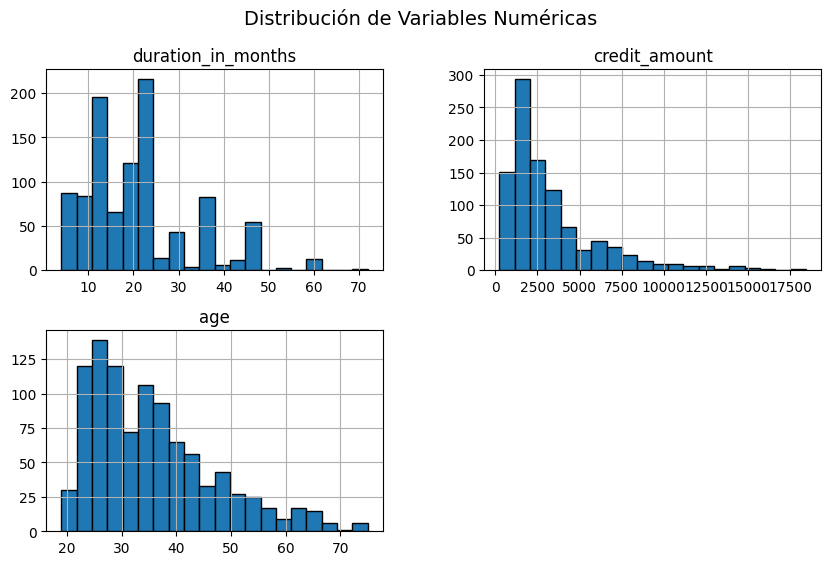

In [16]:
# Graficamos histogramas para variables numéricas
german_credit[lista_paper_num].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=14)
plt.show()


#### Frecuencia de valores en variables categóricas

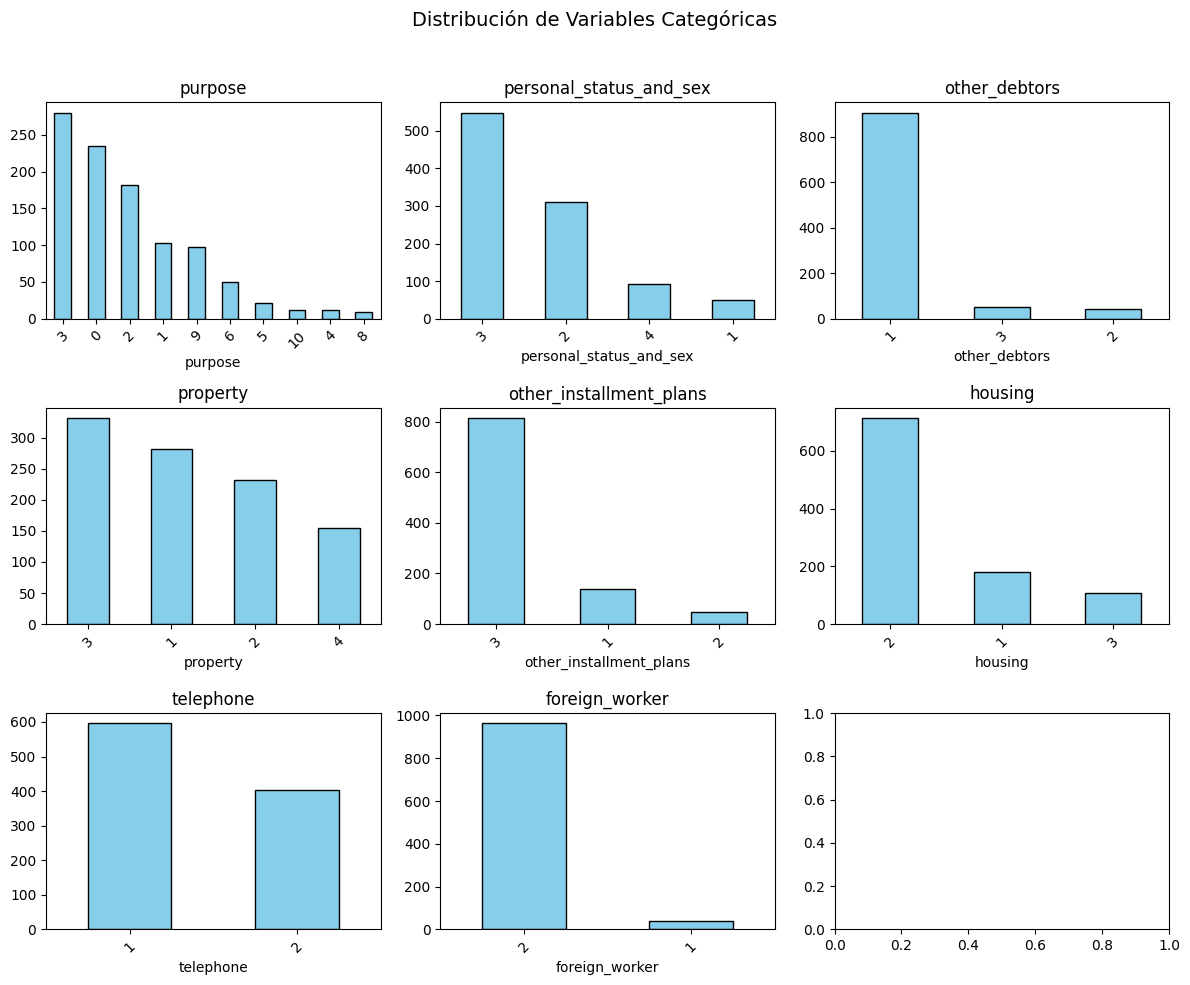

In [17]:
# Graficar la distribución de las variables categóricas más relevantes
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle("Distribución de Variables Categóricas", fontsize=14)

axes = axes.flatten()
for i, col in enumerate(lista_paper_cat[:9]):  # Limitar a las primeras 9 para visualización
    german_credit[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Codificación recomendada (Dummy Encoding o Label Encoding)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding a variables ordinales
label_encoders = {}
for col in lista_paper_ord:
    le = LabelEncoder()
    german_credit[col] = le.fit_transform(german_credit[col])
    label_encoders[col] = le  # Guardar el codificador para futuras referencias

print("Se aplicó Label Encoding a las variables ordinales.")

# Aplicar One-Hot Encoding a variables nominales
german_credit_encoded = pd.get_dummies(german_credit, columns=lista_paper_cat, drop_first=True)

print("Se aplicó One-Hot Encoding a las variables nominales y binarias.")
display(german_credit_encoded.head().T)

Se aplicó Label Encoding a las variables ordinales.
Se aplicó One-Hot Encoding a las variables nominales y binarias.


,0,1,2,3,4
status_existing_account,0,0,1,0,0
duration_in_months,18,9,12,12,12
credit_history,4,4,2,4,4
credit_amount,1049,2799,841,2122,2171
savings_account,0,0,1,0,0
present_employment_since,1,2,3,2,2
installment_rate,3,1,1,2,3
present_residence_since,3,1,3,1,3
age,21,36,23,39,38
existing_credits_at_this_bank,0,1,0,1,1


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ************* Aplicar Codificación a Variables *****************************

# Aplicar Label Encoding a variables ordinales
label_encoders = {}
for col in lista_paper_ord:
    le = LabelEncoder()
    german_credit[col] = le.fit_transform(german_credit[col])
    label_encoders[col] = le  # Guardar el codificador para futuras referencias

print("Se aplicó Label Encoding a las variables ordinales.")

# Aplicar One-Hot Encoding a variables nominales y binarias
german_credit_encoded = pd.get_dummies(german_credit, columns=lista_paper_cat, drop_first=True)

print("Se aplicó One-Hot Encoding a las variables nominales y binarias.")

# Eliminar columnas con un solo valor único (sin variabilidad)
columns_to_drop = [col for col in german_credit_encoded.columns if german_credit_encoded[col].nunique() == 1]
german_credit_encoded.drop(columns=columns_to_drop, inplace=True)

print(f"Se eliminaron {len(columns_to_drop)} columnas sin variabilidad.")

# ************* Normalización de Variables Numéricas *****************************

scaler = StandardScaler()
german_credit_encoded[lista_paper_num] = scaler.fit_transform(german_credit_encoded[lista_paper_num])

print("Se aplicó StandardScaler a las variables numéricas.")

# ************* Visualización de Datos Procesados *****************************

print("\nPrimeras 5 filas del DataFrame procesado:")
display(german_credit_encoded.head().T)

print("\nResumen de las columnas después de la transformación:")
print(german_credit_encoded.dtypes.value_counts())


Se aplicó Label Encoding a las variables ordinales.
Se aplicó One-Hot Encoding a las variables nominales y binarias.
Se eliminaron 0 columnas sin variabilidad.
Se aplicó StandardScaler a las variables numéricas.

Primeras 5 filas del DataFrame procesado:


,0,1,2,3,4
status_existing_account,0,0,1,0,0
duration_in_months,-0.240857,-0.987573,-0.738668,-0.738668,-0.738668
credit_history,4,4,2,4,4
credit_amount,-0.787657,-0.167384,-0.861381,-0.407341,-0.389974
savings_account,0,0,1,0,0
present_employment_since,1,2,3,2,2
installment_rate,3,1,1,2,3
present_residence_since,3,1,3,1,3
age,-1.281573,0.040363,-1.105315,0.30475,0.216621
existing_credits_at_this_bank,0,1,0,1,1



Resumen de las columnas después de la transformación:
bool       23
int64      10
float64     3
Name: count, dtype: int64


Se han transformado para mejorar la convergencia del entrenamiento y reducir sesgos debidos a la escala.

### **Ejercicio 6**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Variables numéricas: Se aplicará StandardScaler para normalizar la escala
numericas_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])
numericas_pipe_nombres = lista_paper_num

# Variables categóricas-Nominales: Se aplicará One-Hot Encoding
nominales_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
nominales_pipe_nombres = lista_paper_cat

# Variables categóricas-Ordinales: Se aplicará Ordinal Encoding
ordinales_pipe = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])
ordinales_pipe_nombres = lista_paper_ord

# Combinar las transformaciones en un ColumnTransformer
columnasTransformer = ColumnTransformer(transformers=[
    ('num', numericas_pipe, numericas_pipe_nombres),
    ('nom', nominales_pipe, nominales_pipe_nombres),
    ('ord', ordinales_pipe, ordinales_pipe_nombres)
])

# Aplicamos la transformación a los datos de entrenamiento
Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)

# Verificamos las dimensiones antes y después de la transformación
print("Dimensión de los datos de entrada:")
print("Antes de aplicar las transformaciones:", Xtmp.shape)
print("Después de aplicar las transformaciones:", tmp.shape)


Dimensión de los datos de entrada:
Antes de aplicar las transformaciones: (800, 20)
Después de aplicar las transformaciones: (800, 35)


In [21]:
import pandas as pd
import numpy as np

# Concatenar los conjuntos de entrenamiento y prueba asegurando que sigan siendo DataFrames
Xtraintest = pd.concat([Xtrain, Xtest], axis=0)  # Mantiene el formato DataFrame
ytraintest = pd.concat([ytrain, ytest], axis=0)  # Mantiene el formato DataFrame

# Verificar transformación con ColumnTransformer
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)

print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 35)


### **Ejercicio 7**

In [22]:
import numpy as np
from imblearn.pipeline import Pipeline as ImbPipeline  # Se corrige la importación
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

def mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    """
    Se lleva a cabo el proceso de entrenamiento y evaluación
    con diferentes métricas.
    
    Args:
        modelo: modelo con la configuración deseada.
        nombre: nombre del modelo.
        Xtraintest, ytraintest: Variables de entrada y variable de salida.
        metodo_uo: método de submuestreo o sobremuestreo, si aplica.
    """

    # Se define el pipeline con el método de balanceo (si aplica)
    pipeline = ImbPipeline(steps=[
        ('sub_sobre_muestreo', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada (5 folds, 3 repeticiones)
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

    # Definición de métricas
    mismetricas = {
        'miaccuracy': 'accuracy',
        'miprecision': 'precision',
        'mirecall': 'recall',
        'mifi': 'f1',
        'miauc': 'roc_auc',
        'migmean': make_scorer(geometric_mean_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Mostrar resultados
    print(f">> {nombre}")
    for j, k in enumerate(list(scores.keys())):
        if j > 1:  # Omitimos 'fit_time' y 'score_time'
            mean_score = np.nan_to_num(np.nanmean(scores[k]))  # Evita NaN
            std_score = np.nan_to_num(np.nanstd(scores[k]))
            print(f"\t{k}: {mean_score:.4f} ({std_score:.3f})")

### **Ejercicio 7a: Regresión Logística**

In [23]:
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, precision_recall_curve, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

# Función para encontrar el umbral óptimo
def encontrar_umbral_optimo(modelo, X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import precision_recall_curve

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    modelo.fit(X_train, np.ravel(y_train))
    y_scores = modelo.predict_proba(X_val)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)
    umbral_optimo = thresholds[np.argmax(f1_scores)]
    
    return umbral_optimo

# Función de evaluación final
def evaluar_modelo(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos
    pipeline = ImbPipeline(steps=[
        ('scaler', MinMaxScaler()),  
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

    # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())
    
    print(f">> {nombre}")
    return df_resultados

# Configuración final del modelo con ElasticNet optimizado
modelo_logistic= LogisticRegression(
    solver='saga',  
    C=0.05,  # Ajustamos regularización para recuperar recall
    max_iter=10000,  
    penalty='elasticnet',  
    l1_ratio=0.5,  # Balanceamos L1 y L2
    random_state=42
)

# Aplicar SMOTE-Tomek con un mejor balance
metodo_uo = SMOTETomek(sampling_strategy=0.85, random_state=42)

# Encontrar nuevo umbral óptimo
umbral_optimo = encontrar_umbral_optimo(modelo_logistic, Xtraintest, ytraintest)
umbral_optimo = min(umbral_optimo + 0.02, 0.30)  # Ajustamos el umbral para recuperar recall
print(f"Umbral óptimo ajustado: {umbral_optimo:.3f}")

# Evaluación con el modelo final
df_model_regression = evaluar_modelo(modelo_logistic, "Regresión Logística:", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_regression.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_regression

Umbral óptimo ajustado: 0.300
>> Regresión Logística:


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.722667,0.034538,0.730333,0.013436
precision,0.530886,0.043909,0.538895,0.018168
recall,0.697778,0.054046,0.707778,0.017864
f1,0.601889,0.041813,0.611728,0.015432
roc_auc,0.766329,0.033606,0.777510,0.010481
g_mean,0.715556,0.034326,0.723889,0.012639


### **Ejercicio 7b: k-Vecinos Más Cercanos (kNN)**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Función de evaluación para KNN ajustado
def evaluar_modelo_knn(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos
    pipeline = ImbPipeline(steps=[
        ('scaler', MinMaxScaler()),  
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

    # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())
    
    print(f">> {nombre}")
    return df_resultados

# Configuración de KNN ajustado para reducir sobreajuste
modelo_knn = KNeighborsClassifier(
    n_neighbors=17,  # Más vecinos para evitar que memorice
    weights='uniform',  # Cada vecino tiene el mismo peso
    metric='minkowski',  # Reduce sensibilidad a valores extremos
    leaf_size=30,  # Mejora eficiencia en búsqueda de vecinos
    p=1.5,  # Distancia de Manhattan
    n_jobs=-1  # Paralelización
)

# Aplicar SMOTE-Tomek ajustado
metodo_uo = SMOTETomek(sampling_strategy=0.78, random_state=42)

# Evaluación con el modelo mejorado
df_model_knn = evaluar_modelo_knn(modelo_knn, "KNN:", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_knn.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_knn

>> KNN:


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.699667,0.031383,0.743083,0.011971
precision,0.500768,0.038440,0.554253,0.015907
recall,0.664444,0.062023,0.736389,0.022436
f1,0.570058,0.041981,0.632322,0.015907
roc_auc,0.749683,0.040908,0.824733,0.011528
g_mean,0.689603,0.034731,0.741171,0.013175


### **Ejercicio 7c: Arbol de decisiones**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Función de evaluación para el mejor Árbol de Decisión
def evaluar_model_dt(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos
    pipeline = ImbPipeline(steps=[
        ('scaler', MinMaxScaler()),  
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

    # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())
    
    print(f">> {nombre}")
    return df_resultados

# Configuración del Árbol de Decisión con los mejores hiperparámetros
modelo_dt_mejor = DecisionTreeClassifier(
    criterion='entropy',  # Mejor separación de clases según pruebas
    max_depth=7,  # Ajuste óptimo para evitar sobreajuste y mantener rendimiento
    min_samples_split=40,  # Mantiene estabilidad en la estructura del árbol
    min_samples_leaf=15,  # Evita ramas muy pequeñas
    max_features=None,  # Usa todos los atributos disponibles
    class_weight=None,  # Dejar que el modelo aprenda el balance de clases por sí mismo
    random_state=42
)

# Aplicar SMOTE con un mejor ajuste para mejorar el balance
metodo_uo = SMOTE(sampling_strategy=0.80, random_state=42)

# Evaluación con el Mejor Árbol de Decisión
df_model_dt = evaluar_model_dt(modelo_dt_mejor, "Árbol de Decisión:", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_dt.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_dt

>> Árbol de Decisión:


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.670667,0.028158,0.770083,0.018521
precision,0.463769,0.034170,0.605544,0.032834
recall,0.555556,0.084474,0.690000,0.059020
f1,0.500895,0.035631,0.642428,0.023800
roc_auc,0.702552,0.024536,0.840323,0.014443
g_mean,0.637778,0.023792,0.747202,0.017487


### **Ejercicio 7d: Bosque Aleatorio - Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Función de evaluación para el Random Forest final
def evaluar_model_rf(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos
    pipeline = ImbPipeline(steps=[
        ('scaler', MinMaxScaler()),  
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

    # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())
    
    print(f">> {nombre}")
    return df_resultados

# Configuración del Bosque Aleatorio (Random Forest) con ajustes finales
model_rf = RandomForestClassifier(
    n_estimators=150,  # Más árboles para estabilidad
    criterion='gini',  # Separación de clases más efectiva
    max_depth=8,  # Control de profundidad para evitar sobreajuste
    min_samples_split=50,  # Evita divisiones innecesarias
    min_samples_leaf=10,  # Asegura que cada rama tenga suficientes datos
    max_features='log2',  # Usa solo un subconjunto aleatorio de features en cada árbol
    class_weight='balanced_subsample',  # Mejor balanceo en cada árbol
    random_state=42,
    n_jobs=-1  # Usa todos los núcleos disponibles para acelerar el entrenamiento
)

# Aplicar SMOTE con mejor ajuste
metodo_uo = SMOTE(sampling_strategy=0.80, random_state=42)

# Evaluación con el Random Forest Final
df_model_rf = evaluar_model_rf(model_rf, "Random Forest:", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_rf.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_rf

>> Random Forest:


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.729000,0.033774,0.798750,0.011493
precision,0.544394,0.050320,0.645305,0.020818
recall,0.631111,0.053008,0.733056,0.015476
f1,0.583210,0.044081,0.686194,0.014937
roc_auc,0.776397,0.033687,0.872501,0.005669
g_mean,0.701032,0.033618,0.779980,0.010842


### **Ejercicio 7e: XGBoosting**

In [27]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Función de evaluación para XGBoost ajustado
def evaluar_model_xgb(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos
    pipeline = ImbPipeline(steps=[
        ('scaler', MinMaxScaler()),  
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

    # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())
    
    print(f">> {nombre}")
    return df_resultados

# Configuración del modelo XGBoost ajustado
model_xgb= xgb.XGBClassifier(
    n_estimators=200,  # Número de árboles
    max_depth=5,  # Profundidad menor para evitar sobreajuste
    learning_rate=0.03,  # Velocidad de aprendizaje más baja
    subsample=0.8,  # Porcentaje de datos usados en cada iteración
    colsample_bytree=0.8,  # Porcentaje de features usadas en cada árbol
    gamma=0.3,  # Penaliza ramas innecesarias
    scale_pos_weight=2.0,  # Mejora el recall al balancear la clase positiva
    random_state=42,
    eval_metric="logloss"  # Métrica de evaluación estándar en XGBoost
)

# Aplicar SMOTE con mejor ajuste
metodo_uo = SMOTE(sampling_strategy=0.80, random_state=42)

# Evaluación con el XGBoost Ajustado
df_model_xgb = evaluar_model_xgb(model_xgb, "XGBoost:", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_xgb.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_xgb

>> XGBoost:


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.727333,0.030869,0.926583,0.007977
precision,0.540730,0.045087,0.820983,0.018654
recall,0.648889,0.046135,0.966667,0.007607
f1,0.588558,0.036334,0.887758,0.011114
roc_auc,0.783881,0.029834,0.988046,0.001491
g_mean,0.704921,0.029218,0.938036,0.006449


### **Ejercicio 7f: Red Neuronal Multicapa (MLP)**

In [28]:
# Importamos las librerías necesarias
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Función para evaluar el modelo
def evaluar_model_mlp(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos (si aplica)
    pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),  # Normalización de datos
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada (5 folds, 3 repeticiones)
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

      # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame con las métricas como índice
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())

    # Mostrar los resultados
    print(f">> {nombre}")
    return df_resultados

# Configuración optimizada del modelo MLP
model_mlp = MLPClassifier(
    hidden_layer_sizes=(30, 15, 5),  # Menos capas y neuronas para reducir overfitting
    activation='relu',  # Función de activación
    solver='adam',  # Optimizador
    alpha=0.1,  # Mayor regularización L2 para evitar sobreajuste
    batch_size=32,  # Mini-lotes más pequeños para mejorar generalización
    learning_rate_init=0.0005,  # Menor tasa de aprendizaje para convergencia más estable
    max_iter=2000,  # Más iteraciones para asegurar convergencia
    early_stopping=True,  # Para detener cuando no haya mejoras en validación
    validation_fraction=0.2,  # 20% del dataset se usa para validación
    momentum=0.85,  # Ajuste en el momentum para controlar la velocidad de aprendizaje
    nesterovs_momentum=True,  # Optimización con momentum de Nesterov
    tol=5e-5,  # Umbral más estricto para detener entrenamientos innecesarios
    random_state=42
)

# Método de balanceo de clases
metodo_uo = SMOTETomek(random_state=42)  # Combinación de sobremuestreo y submuestreo

# Evaluación del modelo MLP optimizado
df_model_mlp = evaluar_model_mlp(model_mlp, "MLP: ", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_mlp.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_mlp

>> MLP: 


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.720333,0.023837,0.792333,0.023138
precision,0.529222,0.034507,0.624751,0.035912
recall,0.658889,0.036447,0.778333,0.022730
f1,0.585956,0.025885,0.692722,0.027981
roc_auc,0.762976,0.022025,0.854355,0.022217
g_mean,0.702778,0.020927,0.788333,0.020963


### **Ejercicio 7g: Máquina de Vector Soporte (SVM)**

In [29]:
# Importamos las librerías necesarias
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Función para evaluar el modelo SVM
def evaluar_model_svm(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
    
    # Pipeline con normalización y balanceo de datos (si aplica)
    pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),  # Normalización de datos
        ('resampling', metodo_uo) if metodo_uo else ('passthrough', 'passthrough'),
        ('model', modelo)
    ])

    # Configuración de validación cruzada (5 folds, 3 repeticiones)
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

    # Definición de métricas
    mismetricas = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'g_mean': make_scorer(roc_auc_score)
    }

    # Ejecución de la validación cruzada
    scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), 
                            scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar resultados en DataFrame con las métricas como índice
    df_resultados = pd.DataFrame({
        "Test Score": [np.nanmean(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Test Std": [np.nanstd(scores[f"test_{m}"]) for m in mismetricas.keys()],
        "Train Score": [np.nanmean(scores[f"train_{m}"]) for m in mismetricas.keys()],
        "Train Std": [np.nanstd(scores[f"train_{m}"]) for m in mismetricas.keys()]
    }, index=mismetricas.keys())

    # Mostrar los resultados
    print(f">> {nombre}")
    return df_resultados

# Configuración optimizada del modelo SVM
svm_model = SVC(
    kernel='rbf',  # Kernel RBF para no linealidad
    C=1.5,  # Mayor regularización para mejorar precisión
    gamma=0.002,  # Ajuste fino para patrones complejos
    class_weight={0: 1, 1: 1.5},  # Balance ajustado para no sesgar demasiado
    probability=True,  # Habilita probabilidades para evaluación con AUC
    random_state=42
)

# Método de balanceo de clases
metodo_uo = SMOTE(sampling_strategy=0.65, k_neighbors=4, random_state=42)  # Sobremuestreo moderado

# Evaluación del modelo SVM optimizado
df_model_svm = evaluar_model_svm(svm_model, "SVM Optimizado", Xtraintest, ytraintest, metodo_uo)

# Asegurar que las métricas sean el índice del DataFrame
df_model_svm.index.name = "Métrica"

# Mostrar el DataFrame con las métricas como índice
df_model_svm

>> SVM Optimizado


,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,0.708333,0.024060,0.728250,0.010112
precision,0.510400,0.028165,0.533900,0.012761
recall,0.723333,0.049366,0.748611,0.017851
f1,0.597901,0.031651,0.623090,0.010163
roc_auc,0.781786,0.024750,0.806190,0.005658
g_mean,0.712619,0.027396,0.734067,0.008615


### **Ejercicio 8**

In [30]:
# Extraer los valores de los DataFrames en diccionarios
logistic_results = df_model_regression["Test Score"].to_dict()
knn_results = df_model_knn["Test Score"].to_dict()
dt_results = df_model_dt["Test Score"].to_dict()
rf_results = df_model_rf["Test Score"].to_dict()
xgb_results = df_model_xgb["Test Score"].to_dict()
mlp_results = df_model_mlp["Test Score"].to_dict()
svm_results = df_model_svm["Test Score"].to_dict()

# Crear DataFrame con los valores extraídos y convertirlos a porcentaje
df_comparacion_test = pd.DataFrame(
    [logistic_results, knn_results, dt_results, rf_results, xgb_results, mlp_results, svm_results],
    index=["Regresión Logística", "KNN", "Decision Tree", "Random Forest", "XGBoost", "MLP", "SVM"]
) * 100  # Convertir los valores a porcentaje

# Mostrar la tabla para verificar valores correctos
df_comparacion_test

,accuracy,precision,recall,f1,roc_auc,g_mean
Regresión Logística,72.266667,53.088628,69.777778,60.188891,76.632937,71.555556
KNN,69.966667,50.076840,66.444444,57.005786,74.968254,68.960317
Decision Tree,67.066667,46.376920,55.555556,50.089539,70.255159,63.777778
Random Forest,72.900000,54.439356,63.111111,58.321005,77.639683,70.103175
XGBoost,72.733333,54.072963,64.888889,58.855816,78.388095,70.492063
MLP,72.033333,52.922204,65.888889,58.595607,76.297619,70.277778
SVM,70.833333,51.040004,72.333333,59.790056,78.178571,71.261905


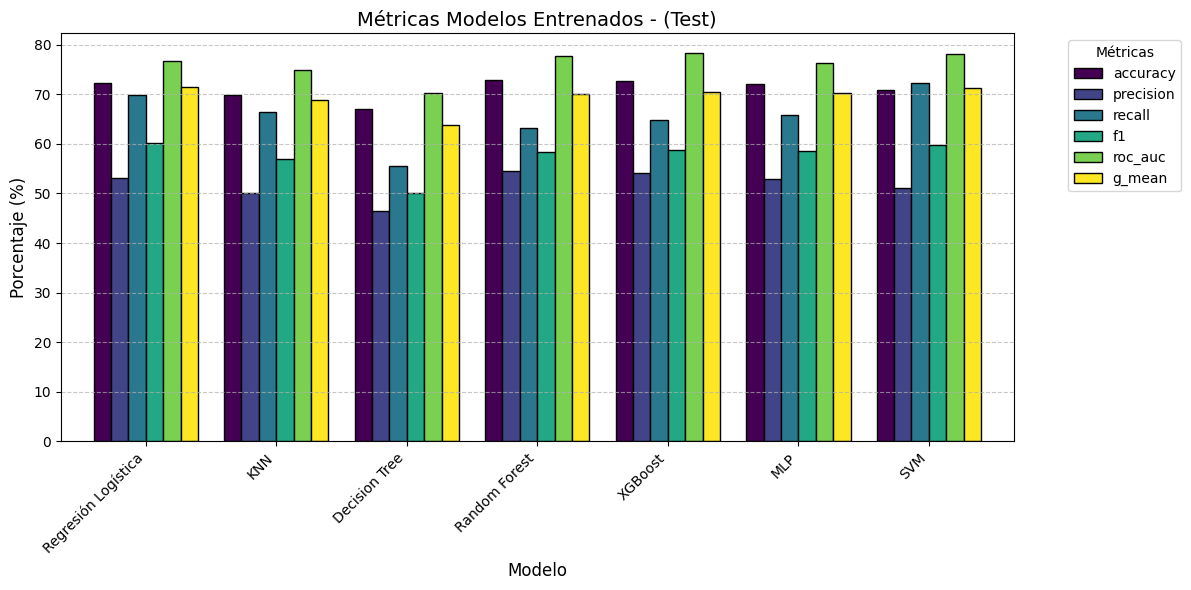

In [31]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos
df_comparacion_test.plot(kind='bar', ax=ax, colormap='viridis', width=0.8, edgecolor='black')

# Configuración de la gráfica
ax.set_title("Métricas Modelos Entrenados - (Test)", fontsize=14)
ax.set_ylabel("Porcentaje (%)", fontsize=12)
ax.set_xlabel("Modelo", fontsize=12)
ax.set_xticklabels(df_comparacion_test.index, rotation=45, ha='right')

# Agregar cuadrícula en el eje Y
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mover la leyenda fuera del gráfico
ax.legend(title="Métricas", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar la distribución para evitar recortes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [32]:
# Extraer los valores de los DataFrames en diccionarios
logistic_results = df_model_regression["Train Score"].to_dict()
knn_results = df_model_knn["Train Score"].to_dict()
dt_results = df_model_dt["Train Score"].to_dict()
rf_results = df_model_rf["Train Score"].to_dict()
xgb_results = df_model_xgb["Train Score"].to_dict()
mlp_results = df_model_mlp["Train Score"].to_dict()
svm_results = df_model_svm["Train Score"].to_dict()

# Crear DataFrame con los valores extraídos y convertirlos a porcentaje
df_comparacion_train = pd.DataFrame(
    [logistic_results, knn_results, dt_results, rf_results, xgb_results, mlp_results, svm_results],
    index=["Regresión Logística", "KNN", "Decision Tree", "Random Forest", "XGBoost", "MLP", "SVM"]
) * 100  # Convertir los valores a porcentaje

# Mostrar la tabla para verificar valores correctos
df_comparacion_train

,accuracy,precision,recall,f1,roc_auc,g_mean
Regresión Logística,73.033333,53.889518,70.777778,61.172781,77.751017,72.388889
KNN,74.308333,55.425258,73.638889,63.232234,82.473313,74.117063
Decision Tree,77.008333,60.554434,69.000000,64.242849,84.032341,74.720238
Random Forest,79.875000,64.530479,73.305556,68.619373,87.250099,77.998016
XGBoost,92.658333,82.098314,96.666667,88.775843,98.804613,93.803571
MLP,79.233333,62.475081,77.833333,69.272162,85.435466,78.833333
SVM,72.825000,53.390005,74.861111,62.308969,80.619048,73.406746


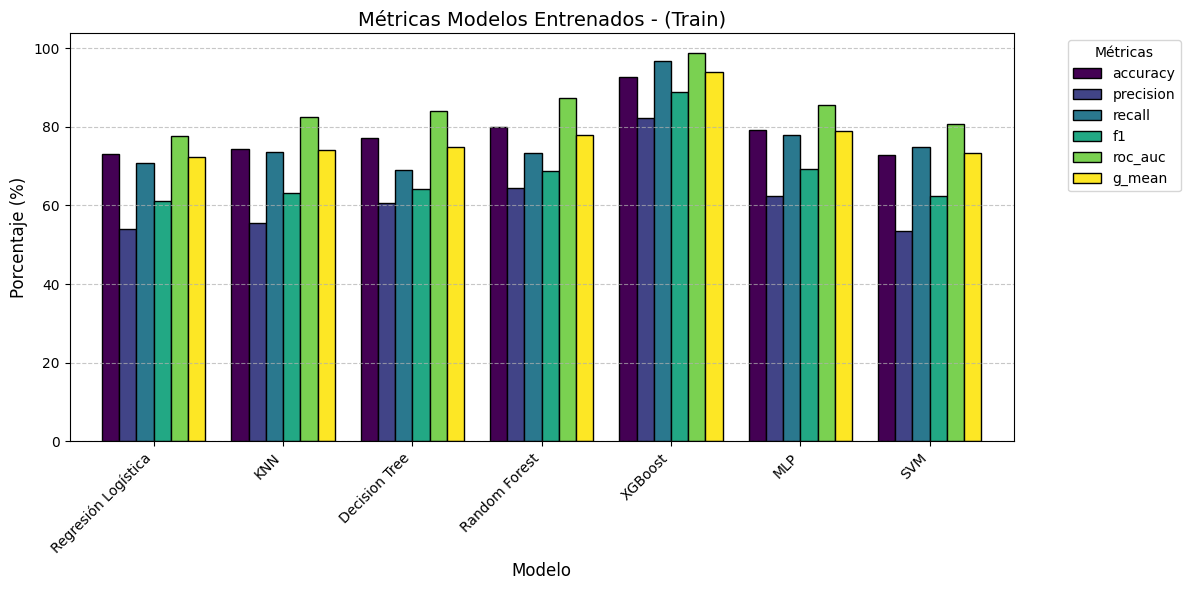

In [33]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos
df_comparacion_train.plot(kind='bar', ax=ax, colormap='viridis', width=0.8, edgecolor='black')

# Configuración de la gráfica
ax.set_title("Métricas Modelos Entrenados - (Train)", fontsize=14)
ax.set_ylabel("Porcentaje (%)", fontsize=12)
ax.set_xlabel("Modelo", fontsize=12)
ax.set_xticklabels(df_comparacion_train.index, rotation=45, ha='right')

# Agregar cuadrícula en el eje Y
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mover la leyenda fuera del gráfico
ax.legend(title="Métricas", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar la distribución para evitar recortes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Mejor Modelo Encontrado: **XGBoost**

#### Hiperparámetros Utilizados:
- **"n_estimators"=200 (Número de árboles en el modelo)**, un número más alto puede mejorar el rendimiento, pero también aumentar el riesgo de overfitting y el tiempo de entrenamiento.
- **"max_depth"= 5 (Profundidad máxima de los árboles)**, profundidades más grandes capturan patrones más complejos, pero pueden llevar a overfitting.
- **"learning_rate"= 0.3 (Tasa de aprendizaje)**, un valor alto (>0.3) puede llevar a una convergencia más rápida pero con riesgo de inestabilidad, mientras que, un valor bajo (<0.1) hace que el modelo aprenda más lento, pero con mayor precisión en el ajuste
- **"subsample"=0.8 (Porcentaje de muestras utilizadas en cada árbol)**, los valores menores a 1.0 ayudan a reducir el overfitting, ya que cada árbol ve solo una parte de los datos
- **"colsample_bytree"= 0.8 (Proporción de características usadas por árbol)**, un valor de 1.0 significa que el modelo usa todas las variables en cada árbol, los Valores menores ayudan a reducir el overfitting.
- **"gamma"= 0.3 (Penalización en la reducción de la pérdida)**, los valores más altos hacen que el modelo sea más conservador y eviten divisiones irrelevantes.
- **"lambda"= 1 (Regularización L2)**, un valor mayor fuerza la regularización, evitando que los pesos de los nodos sean demasiado grandes.
- **"scale_pos_weight"= 2.0 (Balanceo de clases en datos desbalanceados)**, se usa cuando hay una clase significativamente menos representada que otra (desbalanceo de clases).
- **"random_state"= 42 (Semilla para reproducibilidad)**, permite obtener resultados consistentes al ejecutar el modelo varias veces.
- **"eval_metric"= "logloss" (Métrica de evaluación utilizada)**, "logloss" mide la pérdida logarítmica, común en clasificación binaria, puede cambiarse a otras métricas como "auc" para maximizar el área bajo la curva ROC.


#### Técnica de submuestreo y/o sobremuestreo utilizada:

Los datos de entrenamiento see encintraban **desbalanceados**, es decir, una clase era mucho más frecuente que la otra, por lo que el modelos se inclinaba a predecir la clase mayoritaria. Para corregir esto, se aplicaron técnicas de balanceo.

El modelo **XGBoost** incluyó la estrategia de **balanceo de clases** mediante el parámetro `scale_pos_weight`.
- "scale_pos_weight"= 2.0

#### Métricas Obtenidas:

In [34]:
best_modeel=df_model_xgb*100
best_modeel

,Test Score,Test Std,Train Score,Train Std
Métrica,,,,
accuracy,72.733333,3.086890,92.658333,0.797740
precision,54.072963,4.508704,82.098314,1.865399
recall,64.888889,4.613453,96.666667,0.760726
f1,58.855816,3.633400,88.775843,1.111357
roc_auc,78.388095,2.983387,98.804613,0.149081
g_mean,70.492063,2.921842,93.803571,0.644875


El mejor modelo en términos de generalización (buen desempeño en test sin overfitting en train) es XGBoost.

**Desempeño en test:**
- Tiene una alta precisión (54.07%), un buen recall (64.89%), y buen equilibrio en F1-score (58.86%).
- Su ROC AUC (78.39%) y G-Mean (70.49%) indican que el modelo tiene buena capacidad para diferenciar entre clases y manejar balance de datos.

**Desempeño en train:**
- Presenta una accuracy de 92.66%, precision de 82.10%, y recall de 96.67%, lo que sugiere un modelo muy fuerte en entrenamiento.

**Posible overfitting:**
- Aunque XGBoost muestra una diferencia significativa entre el rendimiento en train y test, sigue siendo el modelo con la mayor capacidad predictiva en test, por lo que aún es preferible sobre otros.

Si se busca evitar overfitting, Random Forest podría ser una opción más estable, ya que su diferencia entre train y test es menor, pero en general, XGBoost sigue siendo la mejor opción con estos resultados.

### **Ejercicio 9**

#### **CONCLUSIÓN**

Tras evaluar múltiples modelos para la predicción de riesgo crediticio en los datos South-German, identificamos que XGBoost con SMOTET es la mejor opción en términos de generalización y capacidad predictiva. Este modelo logra un buen balance entre precisión, recall y F1-score en test, a pesar de una brecha notable con su desempeño en entrenamiento.

Si bien XGBoost muestra signos de overfitting, su capacidad para diferenciar entre clases y manejar datos desbalanceados lo hace superior a otras alternativas. Si se prioriza la estabilidad sobre la precisión, Random Forest podría ser una opción más conservadora con menor variabilidad entre train y test.

En resumen, el mejor modelo depende del objetivo final:

- Si se busca la mejor capacidad predictiva → XGBoost.
- Si se busca menor riesgo de sobreajuste → Random Forest.

Este análisis demuestra que la selección del modelo ideal no es solo cuestión de métricas, sino de interpretar su impacto en el problema real.

>> ### **Fin de la Actividad de las Semanas 5 y 6.**